#### **Perkenalan**     

Nama  : Raden Rian Girianom   
Batch : RMT-28

Sumber dataset /referensi = https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset      
dashboard link = https://public.tableau.com/app/profile/garea.a/viz/Milestone1_17073949400080/Dashboard1?publish=yes


#### **Identifikasi Masalah**

Problem Statement = Mengetahui perilaku konsumen dalam memilih dan membeli produk fashion secara online di USA

Menganalisa efektivitas methode pembayaran dan pemberian promo terhadap customer dibutuhkan setidaknya 4 jawaban        
1. Apakah promo code sering digunakan oleh customer
2. Berapa Pengeluaran customer berdasarkan gender
3. Mengetahui korelasi antara pengeluaran customer ketika berbelanja dengan rating review
4. Metode pembayaran paling banyak digunakan dan total pemasukan dari methode pembayaran

**SMART FRAMEWORK**     
Specific    = Gender mana yang mempunyai pengeluaran belanja fashion terbanyak    
Measurable  = Mengukur dari total pembelian oleh pelanggan berapa kali menggunakan promo code  
Achievable  = Memberi promo dengan targetnya adalah meningkatkan penjualan produk yang kurang laku      
Relevant    = korelasi antara pengeluaran customer ketika berbelanja dengan rating review / previous purchase  
Time-bound  = Mengukur Waktu pelanggan melakukan banyak tranksaksi 

#### **Data Loading**

Sumber data /referensi = https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

In [205]:
import pandas as pd

In [206]:
# Import csv

df=pd.read_csv('shopping_trends_updated.csv')
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Terdapat 3900 data, 17 column dan tidak ditemukan adanya missing value  untuk mempermudah analisis data diatas yang akan di drop adalah kolom = Customer ID

#### **Data Cleaning**

Langkah pertama adalah drop kolom yang tidak akan digunakan untuk kebutuhan Analisis yaitu kolom Customer ID

In [18]:
# drop kolom menggunakan df.drop
df.drop(['Customer ID'], axis=1, inplace=True)
df.head(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [215]:
df1['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

Hasil diatas kolom Customer ID telah dihapus        
Langkah kedua adalah cek data type 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

Terdapat 3900 data dan tidak terdapat missing value serta semua kolom telah sesuai dengan datatype nya, bisa dilanjutkan ke tahap berikutnya

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

In [20]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [22]:
# Eksport data yang sudah dibersihkan ke csv

df.to_csv('ShoppingTrend-clean.csv', index=False)
df

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


#### **Analisis dan perhitungan**

In [208]:
# Import terlebih dahulu library python nya
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px #untuk data visualization chart/grafik
import scipy as stats
import scipy.stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
import scipy

In [209]:
# Import csv data yang sudah dibersihkan

df1=pd.read_csv('ShoppingTrend-clean.csv')
df1

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


**Deskriptif Statistik : Central Tendency = Mean, Median, Mode**

In [210]:
# Mean, Median dan Modus Purchase amount (USD) (Spending Customer) dalam berbelanja fashion

meanpurchase = df1['Purchase Amount (USD)'].mean()
medianpurchase = df1['Purchase Amount (USD)'].median()
moduspurchase = df1['Purchase Amount (USD)'].mode()

print(f'Mean dari Purchase amount (USD) adalah : {meanpurchase}')
print(f'Median dari Purchase amount (USD) adalah : {medianpurchase}')
print(f'Modus dari Purchase amount (USD) adalah : {moduspurchase[0]}')

Mean dari Purchase amount (USD) adalah : 59.76435897435898
Median dari Purchase amount (USD) adalah : 60.0
Modus dari Purchase amount (USD) adalah : 32


Berdasarkan perhitungan central tendency untuk kolom Purchase amount in usd : mean lebih rendah dari median 59.764 > 60 yang artinya distribusi data adalah Negatif skew.

In [211]:
# Mean median modus untuk review rating

meanrating = df1['Review Rating'].mean()
medianrating = df1['Review Rating'].median()
modusrating = df1['Review Rating'].mode()

print(f'Mean dari Review Rating adalah : {meanrating}')
print(f'Median dari Review Rating adalah : {medianrating}')
print(f'Modus dari Review Rating adalah : {modusrating[0]}')

Mean dari Review Rating adalah : 3.7499487179487176
Median dari Review Rating adalah : 3.7
Modus dari Review Rating adalah : 3.4


Berdasarkan central tendency untuk kolom review rating : mean lebih tinggi dari median 3.7499 > 3.7 yang artinya distribusi data adalah positiv skew.

Cek skewness dan kurtosisnya

In [212]:
# Cek Kurtosis Purchase amount, Review Rating dan Previous Purchase
print(f"Kurtosis Purchase Amount: {df1['Purchase Amount (USD)'].kurtosis()}")
print(f"Kurtosis Review Rating: {df1['Review Rating'].kurtosis()}")
print(f"Kurtosis Previous Purchase: {df1['Previous Purchases'].kurtosis()}")

Kurtosis Purchase Amount: -1.236593691266159
Kurtosis Review Rating: -1.1796283021299137
Kurtosis Previous Purchase: -1.1901873846405375


Kurtosis untuk 3 kolom diatas hasilny Data distributionnya cenderung rendah (platykurtic)

In [216]:
# Cek Kurtosis Purchase amount, Review Rating dan Previous Purchase

print(f"Skew Purchase Amount: {df1['Purchase Amount (USD)'].skew()}")
print(f"Skew Review Rating: {df1['Review Rating'].skew()}")
print(f"Skew Previous Purchase: {df1['Previous Purchases'].skew()}")

Skew Purchase Amount: 0.012701757626433795
Skew Review Rating: 0.00452459644246527
Skew Previous Purchase: 0.0031211555127652127


Cek Penyebaran Outlier data

<Axes: >

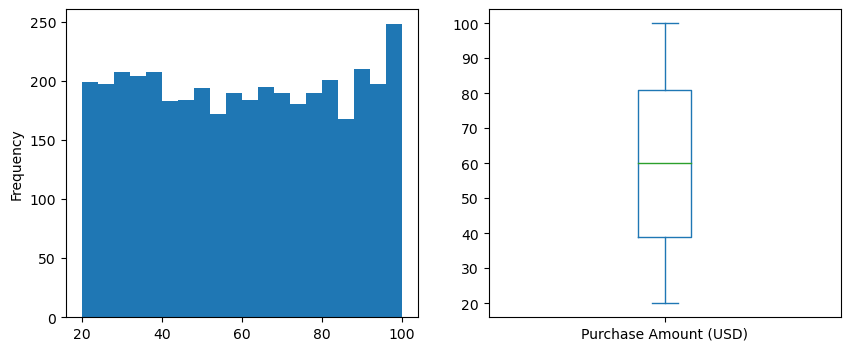

In [213]:
# Cek Penyebaran Outlier Data Purchase Amount (USD)
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df1['Purchase Amount (USD)'].plot(kind='hist',bins=20,ax=ax[0])
df1['Purchase Amount (USD)'].plot(kind='box',ax=ax[1])

<Axes: >

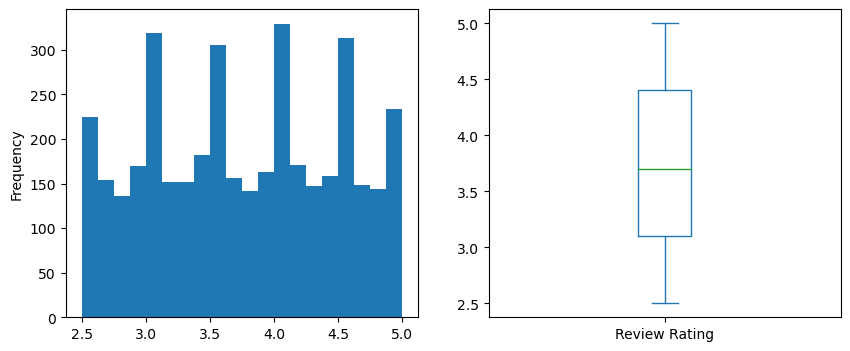

In [203]:
# Cek Penyebaran Outlier Review Rating
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df1['Review Rating'].plot(kind='hist',bins=20,ax=ax[0])
df1['Review Rating'].plot(kind='box',ax=ax[1])

<Axes: >

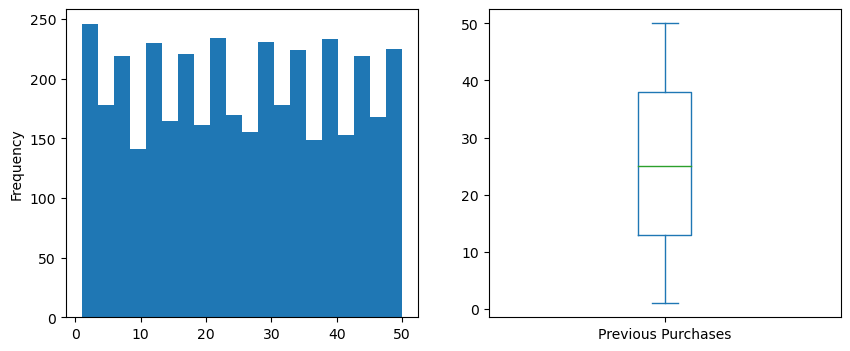

In [204]:
# Cek Penyebaran Outlier Review Rating
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df1['Previous Purchases'].plot(kind='hist',bins=20,ax=ax[0])
df1['Previous Purchases'].plot(kind='box',ax=ax[1])

Dari ketiga grafik diatas tidak ditemukan adanya outlier

In [140]:
# Mean, median dan modus spending customer = Purchase amount groupby gender
 
Spending = df1.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'median', pd.Series.mode])
Spending

,mean,median,mode
Gender,,,
Female,60.249199,60.0,82
Male,59.536199,60.0,36


Data diatas menunjukan untuk rata-rata pengeluaran belanja gender perempuan (female) ada di 60.249 usd dan laki-laki male 59 usd, sedangkan medianya sama 60 usd dan modus untuk gender female adalah 82 usd dan male adalah 36 usd

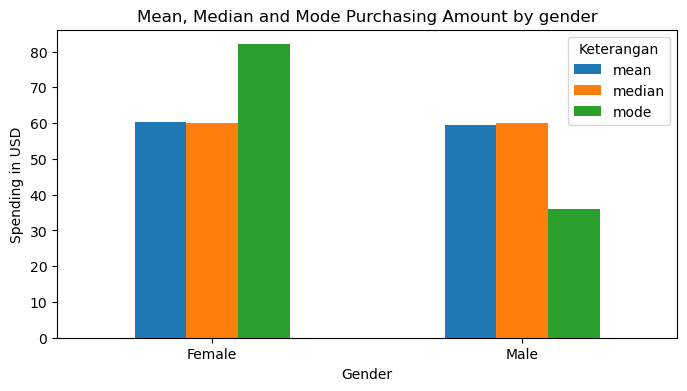

In [217]:
# Divisualisasikan dalam bentuk bar chart

Spending.plot(kind='bar', figsize=(8,4))
plt.title('Mean, Median and Mode Purchasing Amount by gender')
plt.xlabel('Gender')
plt.ylabel('Spending in USD')
plt.xticks(rotation=0)
plt.legend(title='Keterangan')
plt.show()

Berdasarkan grafik diatas spending (pengeluaran) terbesar untuk belanja fashion masih dipegang oleh kategori gender perempuan (female). 

Selanjutnya adalah methode payment apa yang sering digunakan dan berapa total pembayaran untuk masing-masing payment method diatas

In [142]:
payment = df1.groupby('Payment Method')['Purchase Amount (USD)'].sum()
paymentcount = df1.groupby('Payment Method')['Purchase Amount (USD)'].count()

# Dibuat ke dalam dataframe baru dinamakan df3 untuk memudahkan dibuat grafik 
df3 = pd.DataFrame({'Total pembayaran (Sum payment)': payment, 'Berapa kali Metode Pembayaran digunakan': paymentcount})

print(payment)
print(paymentcount)

Payment Method
Bank Transfer    36544
Cash             40002
Credit Card      40310
Debit Card       38742
PayPal           40109
Venmo            37374
Name: Purchase Amount (USD), dtype: int64
Payment Method
Bank Transfer    612
Cash             670
Credit Card      671
Debit Card       636
PayPal           677
Venmo            634
Name: Purchase Amount (USD), dtype: int64


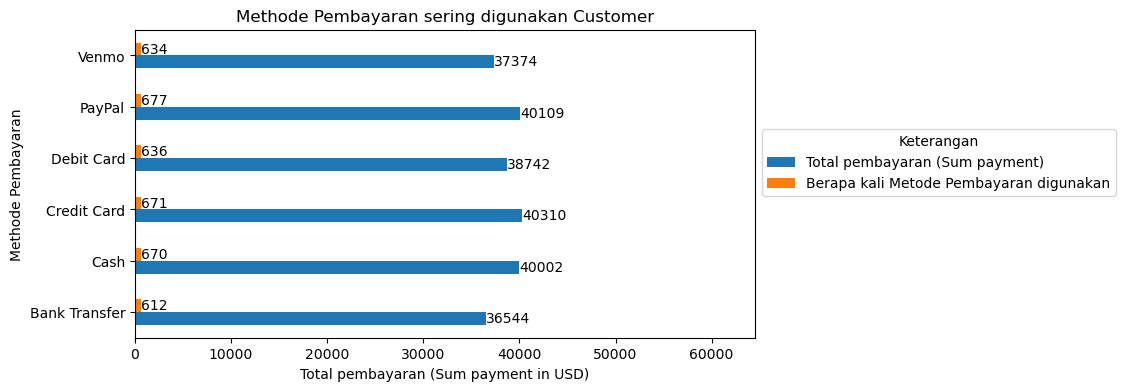

In [143]:
# Selanjutnya membuat bar horizontal chart dari df3/dataframe yang sudah dibuat

ax = df3.plot(kind='barh', ylabel='Methode Pembayaran', title='Methode Pembayaran sering digunakan Customer', figsize=(8, 4))
ax.set(xlabel='Total pembayaran (Sum payment in USD)')
for z in ax.containers:
    # set the bar label (keterangan angka yang ada pada bar)
    ax.bar_label(z, label_type='edge')
    
ax.margins(x=0.6)

# move the legend out of the plot
ax.legend(title='Keterangan', bbox_to_anchor=(1,0.7), loc='best')

Berdasarkan grouped bar chart diatas adanya temuan:       
Jumlah pembayaran yang diterima untuk masing-masing methode tertinggi adalah dari methode pembayaran Credit Card tetapi pelanggan paling banyak melakukan tranksaksi menggunakan methode paypal yaitu 677 kali.

Selanjutnya adalah item fashion yang paling sering / banyak dibeli oleh customer dalam bentuk treemap =       
Gender > Kategori > Item yg terjual + jumlah terjual


In [144]:
# Langkah membuat visualisasi treemap 
# 1 Menghitung jumlah / count kolom gender terlebih dahulu
gendercount = df1['Gender'].value_counts().reset_index()
gendercount.columns = ['Gender', 'Count'] # definisikan dulu jumlahnya dengan count

# 2. Group by Hasil count kolom gender diatas 
category_counts = df1.groupby(['Gender', 'Category']).size().reset_index(name='Count')

# 3. Count / hitung nilai yang sama dari kolom item purchased
itemcounts = df1.groupby(['Gender', 'Category', 'Item Purchased']).size().reset_index(name='Count')

# 4. deploy treemapnya
fig = px.treemap(itemcounts, path=['Gender', 'Category', 'Item Purchased'], values='Count', 
                 title='Treemap produk fashion yang terjual berdasarkan Gender')
fig.show()

Seems like hasilnya untuk Male produk Skirt, Dress dan Blouse seharusnya masuk ke area Female. Kemungkinan ada mis di dataset bawaan atau memang membeli untuk keperluan lain seperti gift who knows...

Dari data diatas untuk kategori customer dengan gender Pria (Male) ternyata masih mendominasi berbelanja fashion walaupun secara jumlah pengeluaran dalam berbelanja fashion untuk customer Wanita (female) masih lebih tinggi 

Berdasarkan Product fashion paling banyak terjual

In [164]:
# Mengekstrak spesifik kolom ke dalam nama baru
Itempurchased_extract = df1['Item Purchased'].value_counts().reset_index()

# Buat kolom baru berdasarkan nama baru diatas
Itempurchased_extract_columns = ['item','count'] # value yang sama diitung dengan count

# Deploy value kolom diatas ke Plotly Bar Horizontal Chart
fig = px.bar(Itempurchased_extract, x='count', y = 'Item Purchased', orientation='h', title='Produk yang Terjual')
fig.show()

Hasil Grafik diatas      
Untuk product fashion dengan 5 penjualan tertinggi : Blouse, Pants, Dress, Jacket dan Sunglasses            
Untuk penjualan 5 terendah product fashion : Jeans, Backpack,Sneakers, Shoes dan Handbag

Sehingga untuk penjualan 5 terendah bisa di tambah promo untuk ke lima produk dengan pembelian terendah, namun kita harus mencari waktu yang tepat untuk memberikan promo sehingga Selanjutnya adalah grouping berapa rentang waktu belanja paling sering dilakukan berdasarkan gender 

In [240]:
freq = df1.groupby(['Gender', 'Frequency of Purchases']).size().reset_index(name='Count')
freq

,Gender,Frequency of Purchases,Count
0,Female,Annually,185
1,Female,Bi-Weekly,188
2,Female,Every 3 Months,186
3,Female,Fortnightly,163
4,Female,Monthly,185
5,Female,Quarterly,169
6,Female,Weekly,172
7,Male,Annually,387
8,Male,Bi-Weekly,359
9,Male,Every 3 Months,398


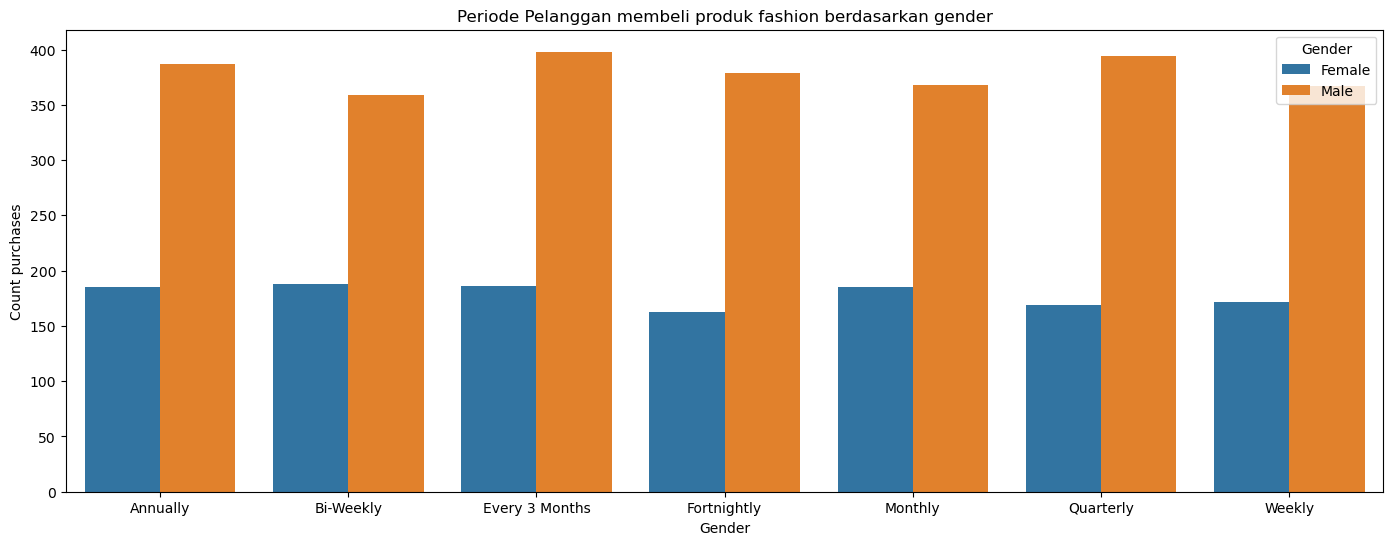

In [259]:
# buat chart menggunakan sns seaborn
plt.figure(figsize=(17,6))
sns.barplot(data=freq, x='Frequency of Purchases', y='Count', hue='Gender')
plt.title('Periode Pelanggan membeli produk fashion berdasarkan gender')
plt.xlabel('Gender')
plt.ylabel('Count purchases')
plt.show()


Berdasarkan data diatas =          
Periode pembelian terbanyak Untuk gender Male adalah setiap 3 bulan dan     
periode pembelian terbanyak untuk gender female adalah setiap 2 minggu. 

Berdasarkan rentang waktu tersebut mungkin bisa memberikan ekstra promo disaat tersebut 

**Statistik Inferential**

Mencari Korelasi apakah review rating mempengaruhi keputusan customer untuk membeli lagi

In [62]:
# Korelasi kolom rating produk dan Previous Purchase

# Extract the column data from your DataFrame
x = df1['Review Rating']
y = df1['Previous Purchases']

# Calculate Pearson correlation coefficient directly using DataFrame columns
pearson_corr, p_value_pearson = pearsonr(x, y)
spearman_corr, p_value_spearman = spearmanr(x, y)
kendall_tau, p_value_tau = kendalltau(x, y)

print("Pearson correlation :", pearson_corr)
print("p-value-pearson:", p_value_pearson)
print("Spearman correlation :", spearman_corr)
print("p-value-spearman:", p_value_spearman)
print("Kendalltau correlation :", kendall_tau)
print("p-value-tau:", p_value_tau)

#scipy.stats.pearsonr(x=df["b"], y=df["c"])

#print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
#print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
#print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

#print(f"pearson correlation: {pearson_corr:.2f}, p-value: {pval_pearson}")
#print(f"spearman correlation: {spearman_corr:.2f}, p-value: {pval_spearman}")
#print(f"kendall correlation: {kendall_corr:.2f}, p-value: {pval_tau}")

Pearson correlation : 0.0042290994652709225
p-value-pearson: 0.791761660185139
Spearman correlation : 0.004438264035333068
p-value-spearman: 0.781717131148996
Kendalltau correlation : 0.002978308211529298
p-value-tau: 0.7865134829644664


Hasilnya diatas adalah menunjukan korelasi yang lemah dari 3 korelasi diatas walaupun p-valuenya semua diatas 0.05 yang artinya adalah korelasi untuk kolom rating dan previous purchase tidak berkaitan. Kemudian untuk korelasi antara rating review dengan purchase amount :

In [68]:
# Korelasi kolom rating produk dan purchase amount

# Extract the column data from your DataFrame
x = df1['Purchase Amount (USD)']
y = df1['Review Rating']

# Calculate Pearson correlation coefficient directly using DataFrame columns
pearson_corr, p_value_pearson = pearsonr(x, y)
spearman_corr, p_value_spearman = spearmanr(x, y)
kendall_tau, p_value_tau = kendalltau(x, y)

print("Pearson correlation :", pearson_corr)
print("p-value-pearson:", p_value_pearson)
print("Spearman correlation :", spearman_corr)
print("p-value-spearman:", p_value_spearman)
print("Kendalltau correlation :", kendall_tau)
print("p-value-tau:", p_value_tau)

Pearson correlation : 0.030775923073914458
p-value-pearson: 0.054631573624773264
Spearman correlation : 0.030379564266363384
p-value-spearman: 0.05782360378309654
Kendalltau correlation : 0.020656567119864397
p-value-tau: 0.059352806250741706


Hasilnya juga tidak ada korelasi signifikan antar 2 variabel tersebut. Selanjutnya analisis berdasarkan hipotesis chi-square

Mencari Chi-Squared Hypothesis Test Berkaitan dengan Gender dan Penggunaan code promo       
Pertama kita definisikan terlebih dahulu null hypotesis (h0) nya

H0: Tidak ada korelasi antara Gender and promo code used in shopping (Male and Female sama).       
H1: Ada korelasi antara Gender and promo code used in shopping (Male and Female are beda).

In [77]:
# dibuat table crosstab terlebih dahulu

table1 = pd.crosstab(df1['Gender'],df1['Promo Code Used'])
table1

Promo Code Used,No,Yes
Gender,,
Female,1248,0
Male,975,1677


In [122]:
result = chi2_contingency(table1)
print("P-value:",result.pvalue)

P-value: 1.7645380691667684e-302


Hasil interpretasi p-value diatas adalah 1.7645380691667684e-302 dari standarnya critical value 0.05 artinya 1.7645380691667684e-302 ada di bawah 0.05 maka kita tolak h0 dan terima h1      
Artinya = Dari data diatas (h1) ditemukan adanya korelasi antara gender dengan penggunaan promo code.

Pengolahan crosstab juga menunjukan mayoritas gender laki-laki (male) lebih banyak berbelanja menggunakan promo code

#### **Pengambilan Kesimpulan**

Berdasarkan Perilaku konsumen dalam membeli produk fashion :        
Untuk Gender Laki-Laki (Male) = Cenderung memanfaatkan promo code dibanding dengan Wanita (Female)      
Untuk Gender Perempuan (Female) = Cenderung tidak memperdulikan / memanfaatkan promo kode saat checkout berbelanja fashion

Untuk Gender Laki-Laki (Male) = Lebih banyak membeli produk fashion dibanding Wanita        
Untuk Gender perempuan (Female) = Lebih sedikit membeli produk fashion dibanding pria tetapi pengeluaran dalam berbelanja produk fashion sangat besar.

Tidak ditemukan adanya korelasi signifikan antara kolom rating dan previous purchase

Berdasarkan Penggunaan total pemasukan terbesar dari customer dengan methode payment credit card         
Berdasarkan jumlah penggunaan metode pembayaran paling banyak adalah 1. Paypal, 2. Credit card, 3.Cash
